In [144]:
from unfold_tools.Unfolder import Unfolder
from unfold_utils.merge_helpers import *
import ROOT
ROOT.gErrorIgnoreLevel = ROOT.kWarning
%load_ext autoreload
%autoreload 2
groomed_dd, closure_dd, closure_herwig_dd = show_groomed_closure_dropdowns(False, False)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Dropdown(description='Groomed:', index=1, options=(('True', True), ('False', False)), value=False)

Dropdown(description='Closure:', index=1, options=(('True', True), ('False', False)), value=False)

Dropdown(description='Closure Herwig:', index=1, options=(('True', True), ('False', False)), value=False)

In [198]:
groomed, closure, herwig_closure = groomed_dd.value, closure_dd.value, closure_herwig_dd.value
unfolder = Unfolder(groomed=groomed, closure=closure, herwig_closure = herwig_closure )

latest_pkl/0508/mc_0508_full.pkl
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure is True
Closure

Warning in <TROOT::Append>: Replacing existing TH1: hRecoData (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hTruthPrior (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hResponse (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: cov (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: cov_uncorr (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: cov_uncorr_data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: total (Potential memory leak).
Warning in <TUnfoldBinning::CreateHistogram>: Original binning can not be represented as THxx
Warning in <TROOT::Append>: Replacing existing TH1: unfold (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hRecoData (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hTruthPrior (Potential memory leak).
Warning in <TROOT::Append>: Replacing 

Singular values of the response mosaic: [1.01404007 0.91952431 0.86243119 0.8215166  0.72804684 0.62691942
 0.61187612 0.55458311 0.54600673 0.5140561  0.49217441 0.45008492
 0.44366898 0.42135218 0.39328468 0.38693315 0.35577298 0.33558027
 0.3102477  0.30716922 0.26300603 0.25512913 0.21169448]


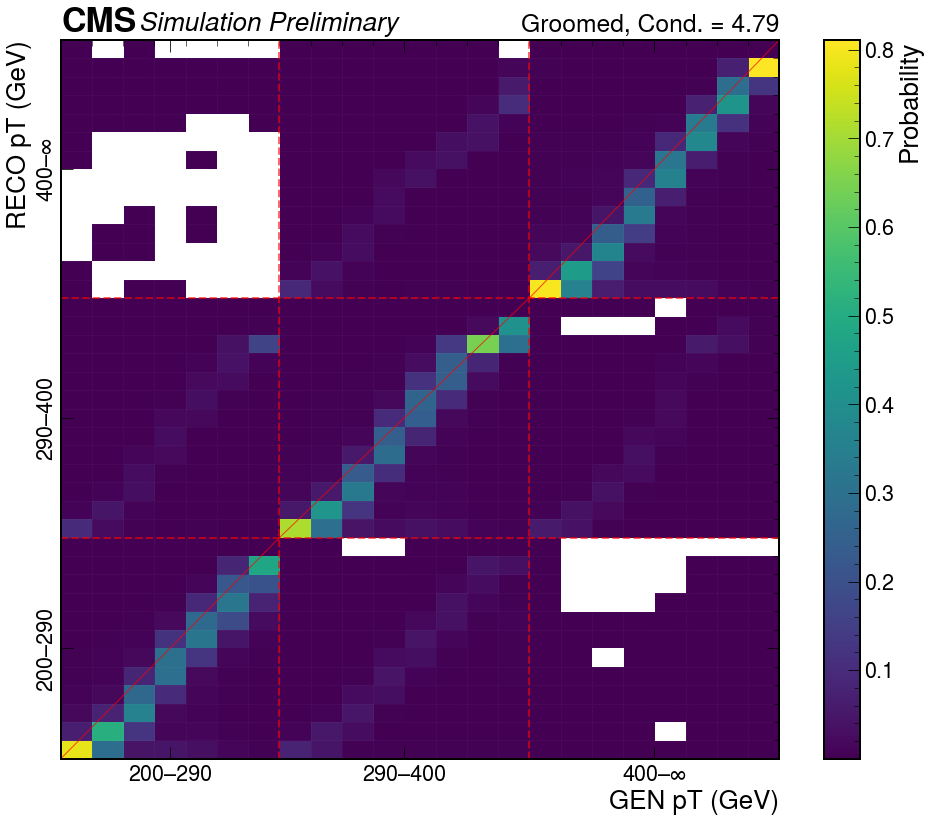

In [199]:
import mplhep as hep
hep.style.use("CMS")
unfolder.plot_response_matrix(probability = True)

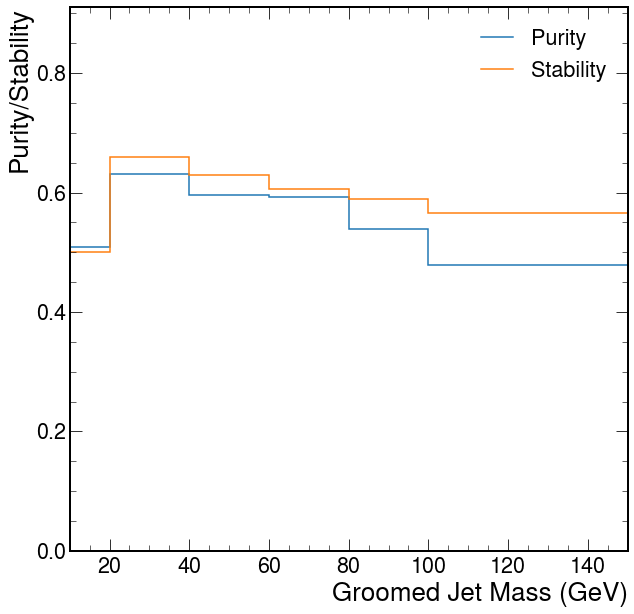

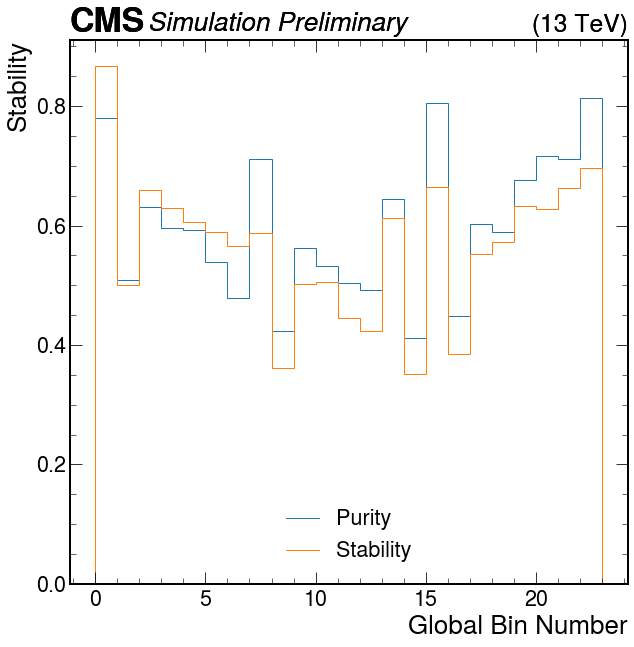

In [200]:
unfolder.plot_purity_stability()

In [201]:
herwig_matrix = unfolder.mosaic_dict['herwigUp']
pythia_matrix = unfolder.mosaic_dict['nominal']
#save them into a numpy readable file inside the ROOT_files folder
import numpy as np
np.save('ROOT_files/herwig_matrix_merged.npy', herwig_matrix)
np.save('ROOT_files/pythia_matrix_merged.npy', pythia_matrix)

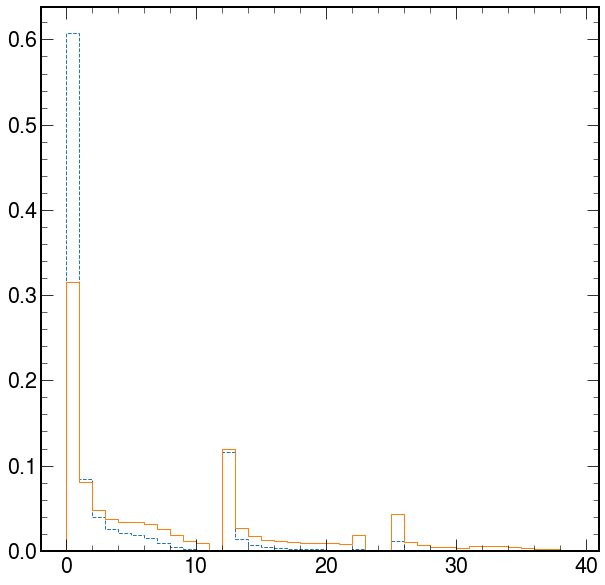

In [202]:
folded = unfolder.mosaic @ unfolder.y_true
plt.stairs(folded/folded.sum(), ls = "--")
plt.stairs(unfolder.mosaic.sum(axis = 1)/unfolder.mosaic.sum())


Herwig pt Binned [array([171501.91144976,  50420.28613585,  59915.68464944,  42712.54086622,
        30401.70042489,  14682.2313679 ,   5202.83905694]), array([63112.65210808, 17575.56307401, 20308.31002862, 14215.14495721,
        9531.09531328,  7476.44023259,  7567.70573733,   592.69964095]), array([25718.95341081,  7315.65440221,  8944.28805948,  5142.94330293,
        5915.55521022,  4309.61437862,  1798.57448865,   480.91497595])]


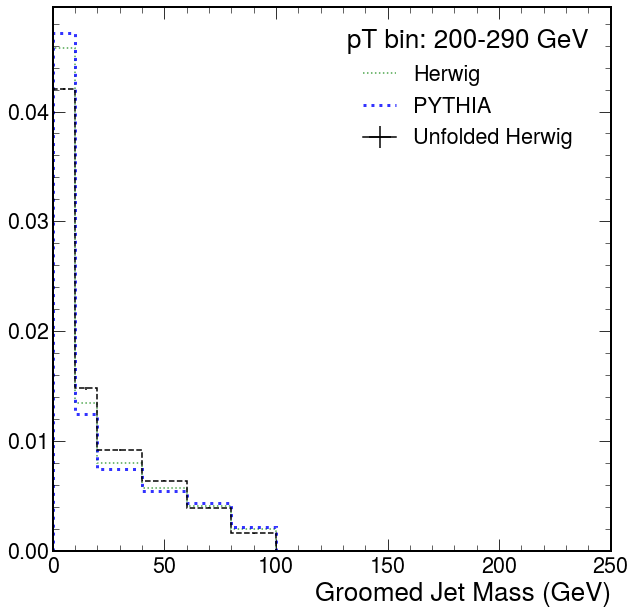

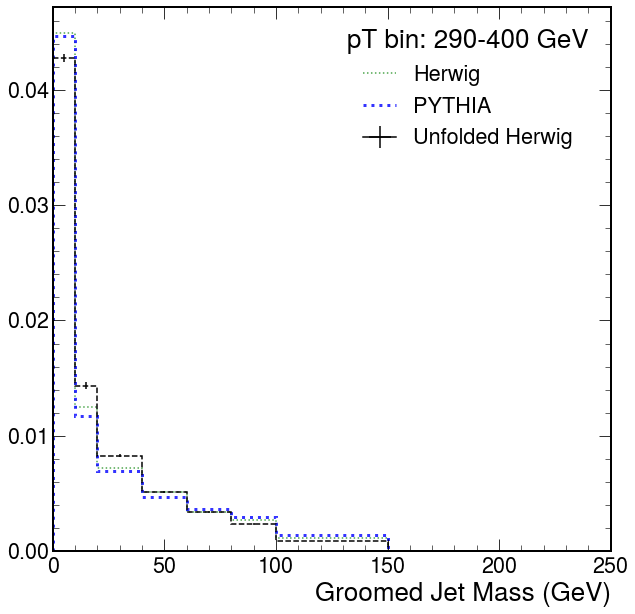

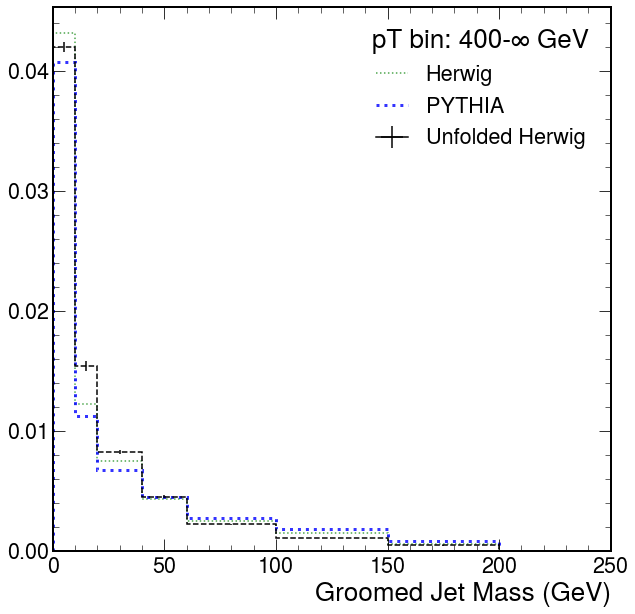

In [206]:
hep.style.use("CMS")
unfolder.plot_unfolded()

In [207]:
unfolder.normalized_herwig[1]

array([4.49585603e-02, 1.25200255e-02, 7.23335457e-03, 5.06310883e-03,
       3.39475770e-03, 2.66293665e-03, 1.07817733e-03, 3.28569693e-07])

In [ ]:
plt.figure(figsize = (10,3))
edges = unfolder.normalized_results[1]['mgen_edges'].copy()
edges[-1] = 250
hep.histplot(unfolder.normalized_results[1]['unfolded']/unfolder.normalized_results[1]['true'],edges, yerr =unfolder.normalized_results[1]['unfolded_err']/unfolder.normalized_results[1]['true'] , color = 'black', ls = 'dotted')
plt.ylabel("Data/MC")
plt.xlabel("Groomed Jet Mass (GeV)")
plt.ylim(0.9, 1.1)
plt.xlim(0,250)


Text(1, 0, 'Groomed Jet Mass (GeV)')

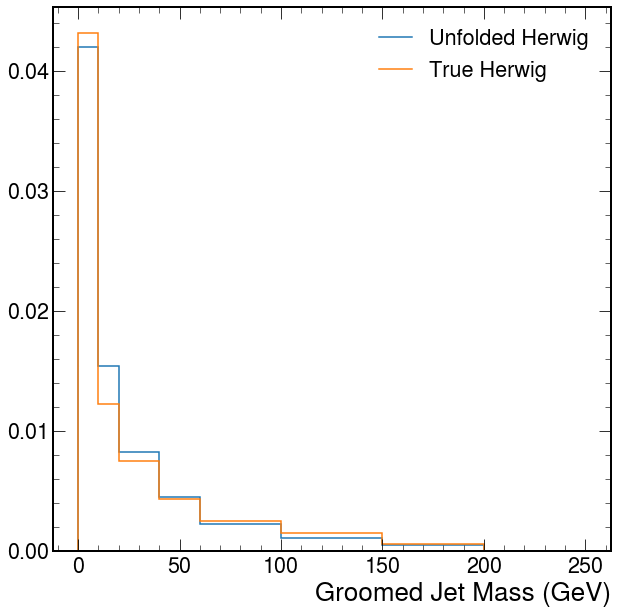

In [241]:
i = 2
edges = unfolder.normalized_results[i]['mgen_edges'].copy()
edges[-1] = 250
hep.histplot(unfolder.normalized_results[i]['unfolded'],edges, label = "Unfolded Herwig")
hep.histplot(unfolder.normalized_herwig[i],  edges, label = "True Herwig")
plt.legend()
plt.xlabel("Groomed Jet Mass (GeV)")

(10.0, 250.0)

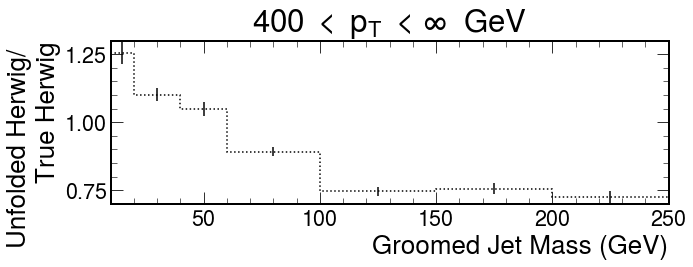

In [238]:
plt.figure(figsize = (10,3))
edges = unfolder.normalized_results[i]['mgen_edges'].copy()
edges[-1] = 250
hep.histplot(unfolder.normalized_results[i]['unfolded']/unfolder.normalized_herwig[i],edges, yerr =unfolder.normalized_results[i]['unfolded_err']/unfolder.normalized_results[i]['true'] , color = 'black', ls = 'dotted')
#hep.histplot(np.ones(len(model)), edges, yerr = model/unfolder.normalized_herwig[1], histtype = 'errorbar')
plt.ylabel("Unfolded Herwig/ \nTrue Herwig")
plt.xlabel("Groomed Jet Mass (GeV)")
plt.title(title_list[i])
plt.ylim(0.7, 1.3)
plt.xlim(10,250)

(10.0, 250.0)

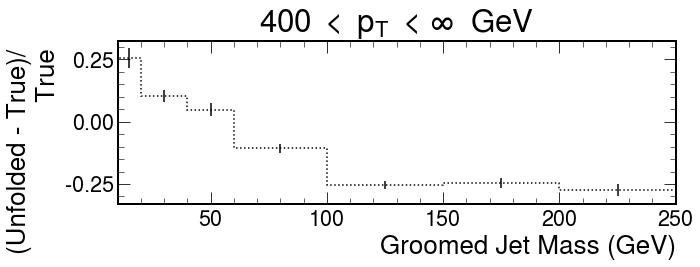

In [239]:
plt.figure(figsize = (10,3))
edges = unfolder.normalized_results[i]['mgen_edges'].copy()
edges[-1] = 250
hep.histplot((unfolder.normalized_results[i]['unfolded']-unfolder.normalized_herwig[i])/unfolder.normalized_herwig[i],edges, yerr =unfolder.normalized_results[i]['unfolded_err']/unfolder.normalized_results[i]['true'] , color = 'black', ls = 'dotted')
#hep.histplot(np.ones(len(model)), edges, yerr = model/unfolder.normalized_herwig[1], histtype = 'errorbar')
plt.ylabel("(Unfolded - True)/ \n True ")
plt.xlabel("Groomed Jet Mass (GeV)")
plt.title(title_list[i])
#plt.ylim(0.7, 1.3)
plt.xlim(10,250)

In [212]:
model = np.array([4.47923126e-02, 1.03519500e-02, 6.22355510e-03, 4.46825354e-03,
       3.58888898e-03, 3.34849830e-03, 1.76502284e-03, 6.00958249e-07]) - 

In [188]:
unfolder.normalized_systematics[1]['unfolded']['herwigUp']

array([4.47923126e-02, 1.03519500e-02, 6.22355510e-03, 4.46825354e-03,
       3.58888898e-03, 3.34849830e-03, 1.76502284e-03, 6.00958249e-07])

In [152]:
filename = 'unfolding_data_groomed.pkl'

# Open the file in binary write mode ('wb').
# 'wb' is essential for pickle to work correctly.
with open(filename, 'wb') as file:
    # Use pickle.dump() to save the data to the file.
    pkl.dump(unfolder.normalized_results, file)


In [153]:
print(unfolder.normalized_results[0]['unfolded'])
print(unfolder.normalized_systematics[0]['unfolded']['JERUp'])
print(unfolder.normalized_systematics[0]['unfolded']['JERDown'])

diff_up = unfolder.normalized_results[0]['unfolded'] - unfolder.normalized_systematics[0]['unfolded']['JERUp']
print("Difference Up:", diff_up)

[2.07448787e-02 1.82128271e-02 7.52027196e-03 5.45204684e-06]
[2.08213197e-02 1.81605853e-02 7.51343937e-03 5.42516343e-06]
[2.06531365e-02 1.82841235e-02 7.52098350e-03 5.48259509e-06]
Difference Up: [-7.64410282e-05  5.22417541e-05  6.83258787e-06  2.68834151e-08]


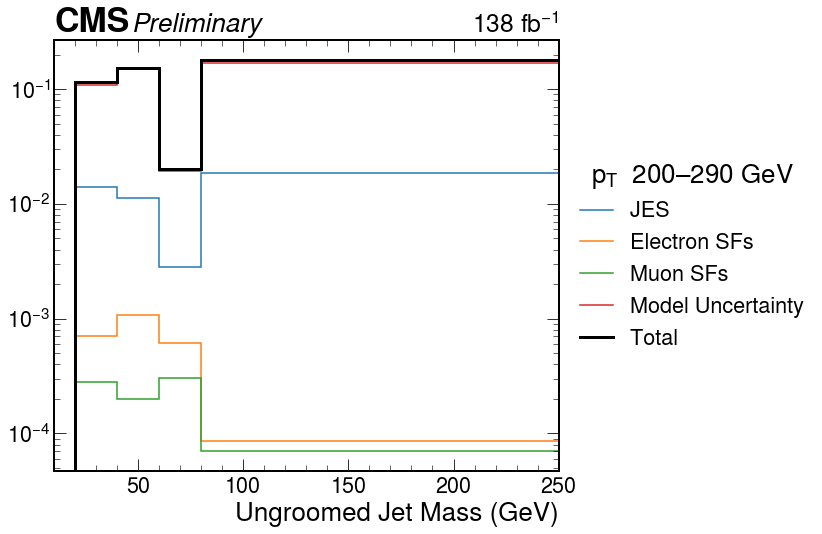

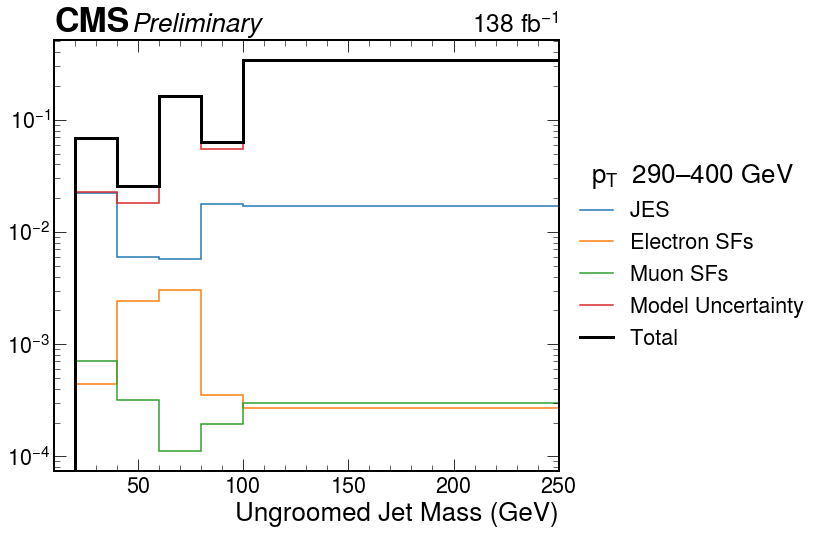

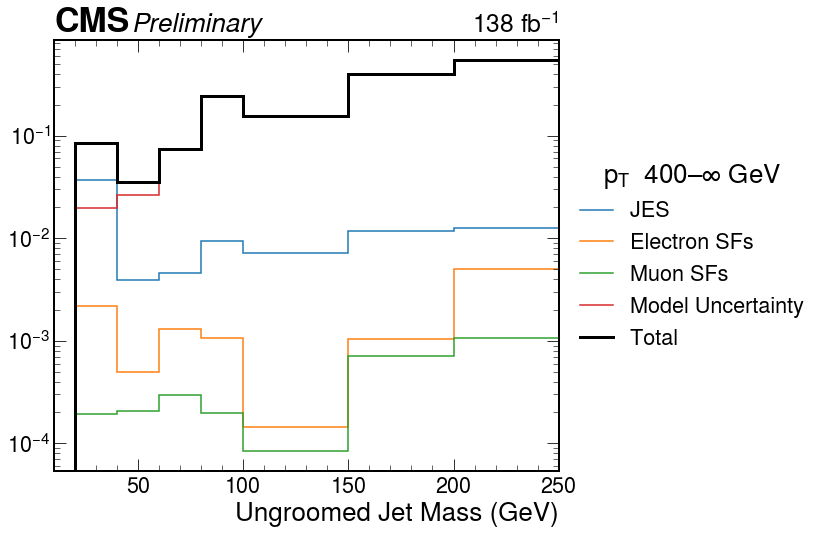

In [154]:
unfolder.plot_systematic_fraction()

In [143]:
unfolder.normalized_results[2]['syst_fraction_dict'].keys()

dict_keys(['JESUp', 'JESDown', 'ElectronSFUp', 'ElectronSFDown', 'MuonSFUp', 'MuonSFDown', 'puUp', 'puDown', 'pdfUp', 'pdfDown', 'q2Up', 'q2Down', 'prefiringUp', 'prefiringDown', 'JERUp', 'JERDown', 'JMRUp', 'JMRDown', 'JMSUp', 'JMSDown', 'herwigUp', 'herwigDown', 'Total_Up', 'Total_Down'])

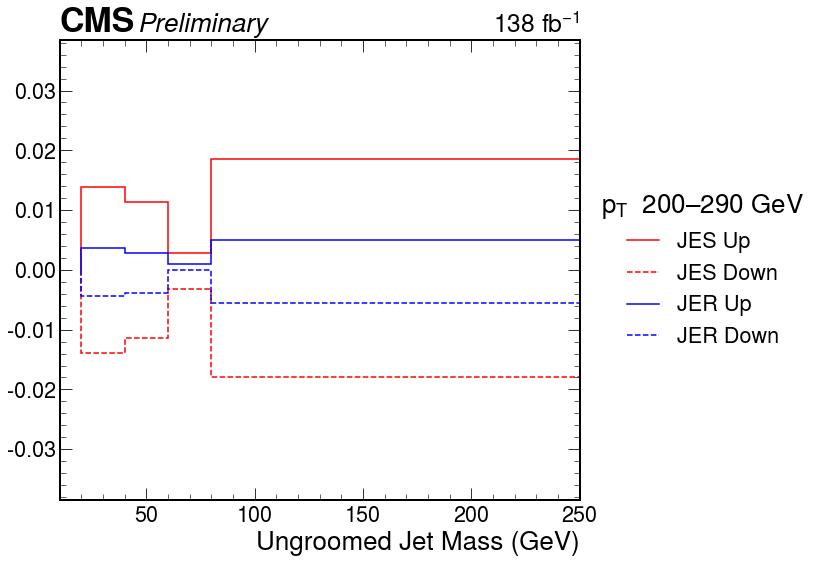

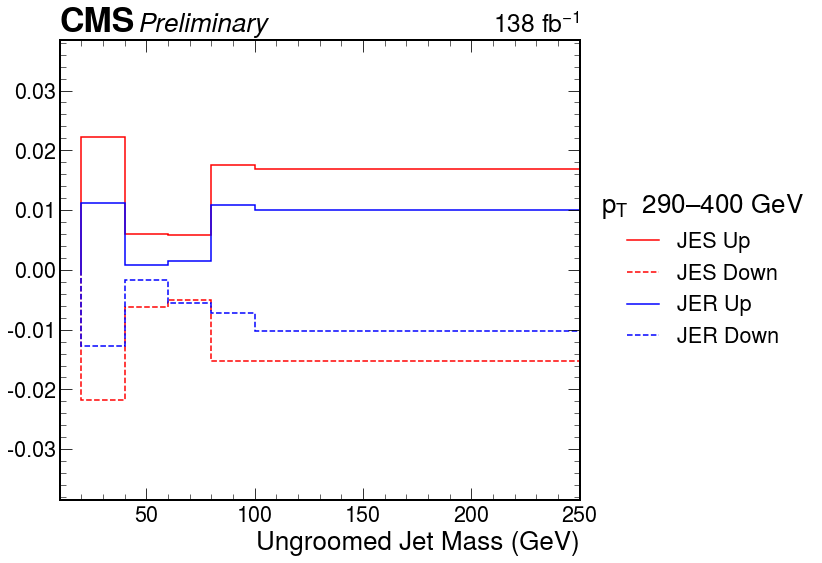

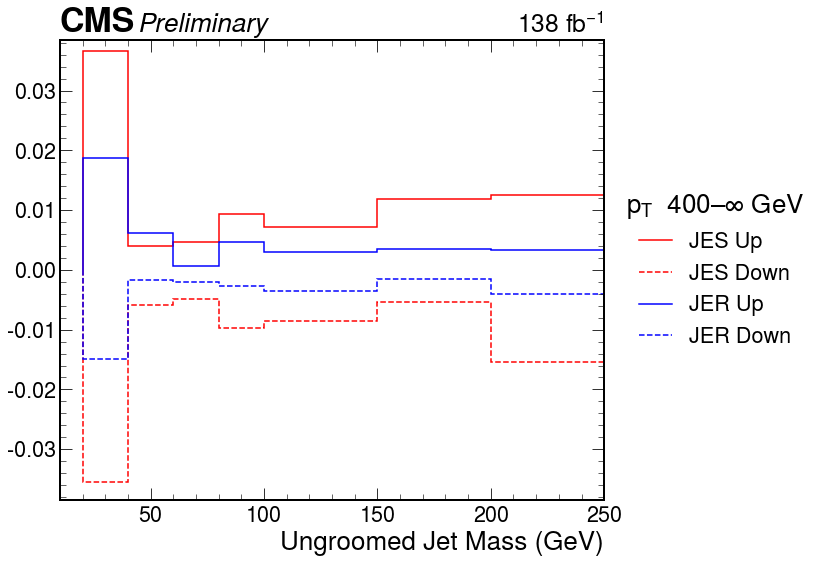

In [131]:
unfolder.plot_systematic_frac_indiv(['JES','JER'])

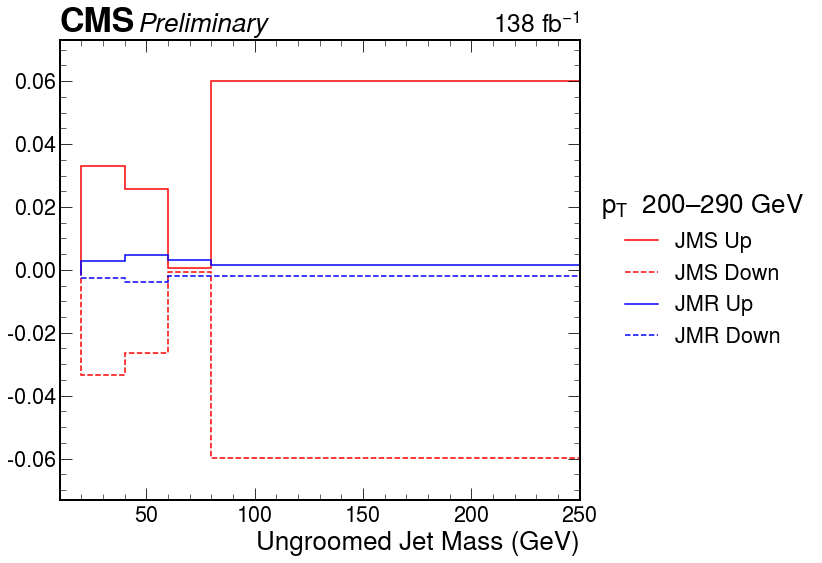

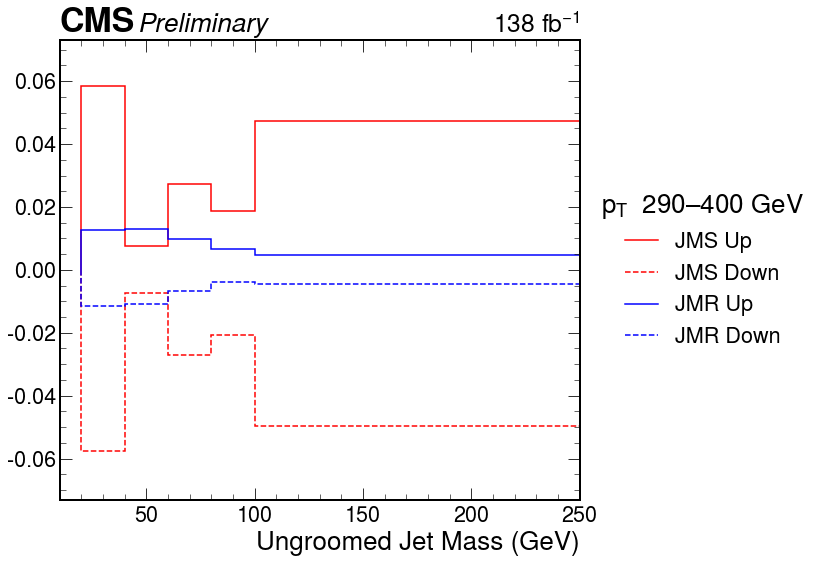

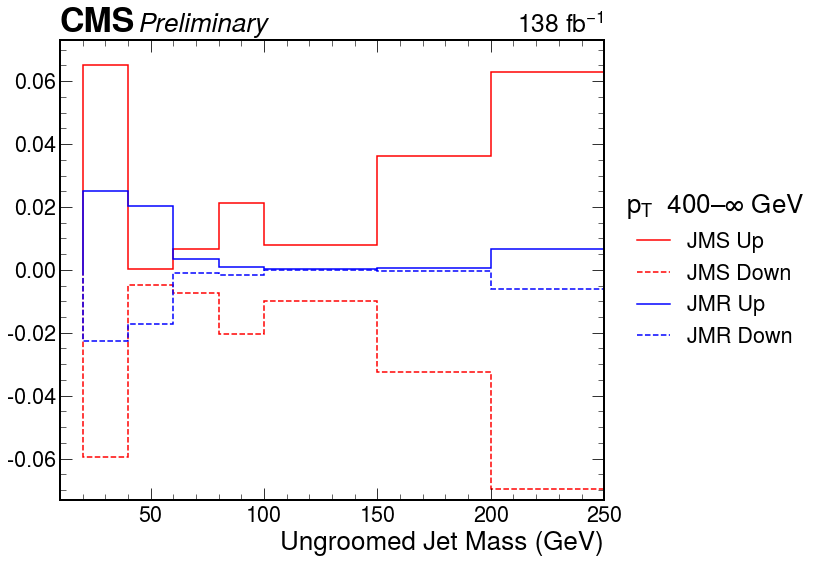

In [230]:
unfolder.plot_systematic_frac_indiv(['JMS','JMR'])

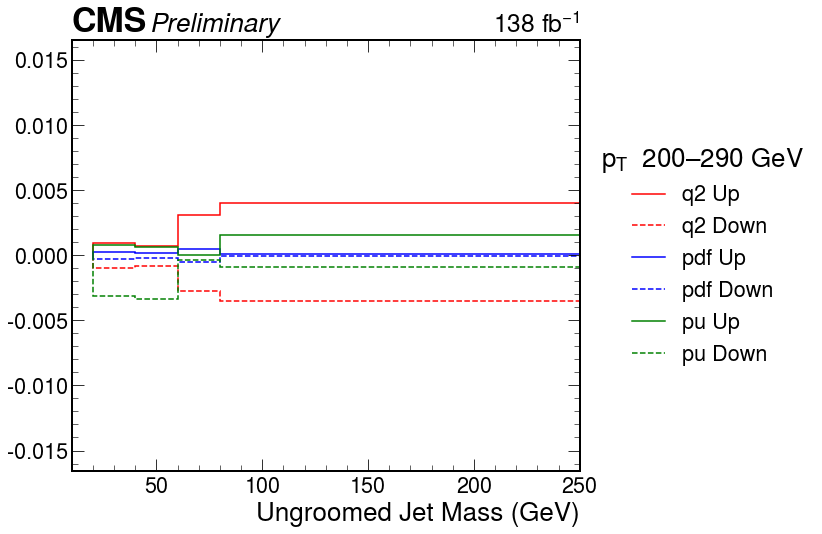

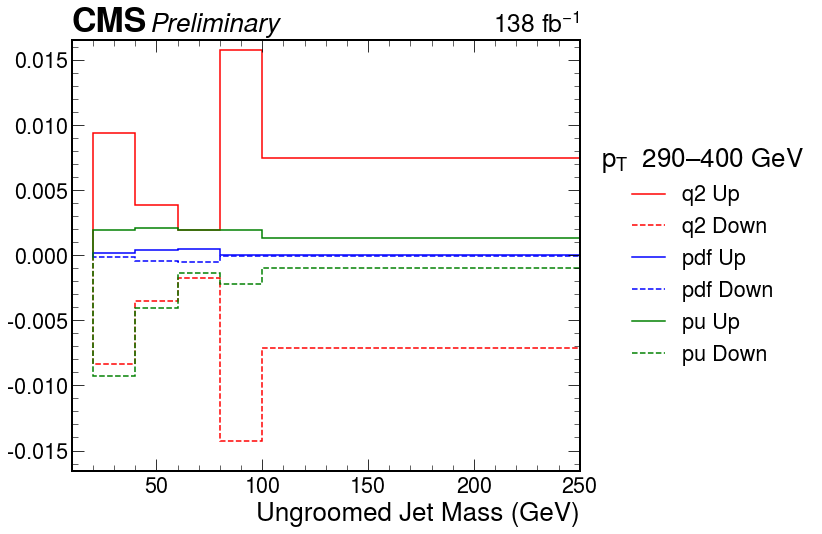

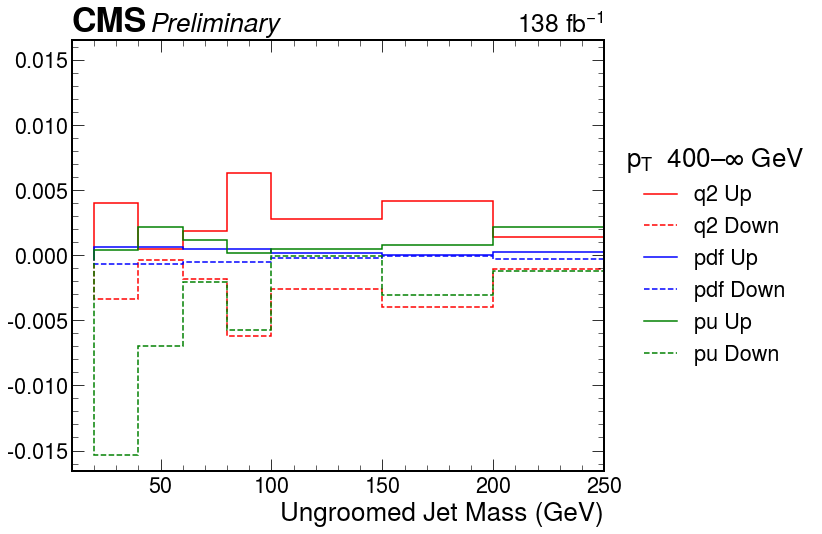

In [24]:
unfolder.plot_systematic_frac_indiv(['q2','pdf', 'pu'])

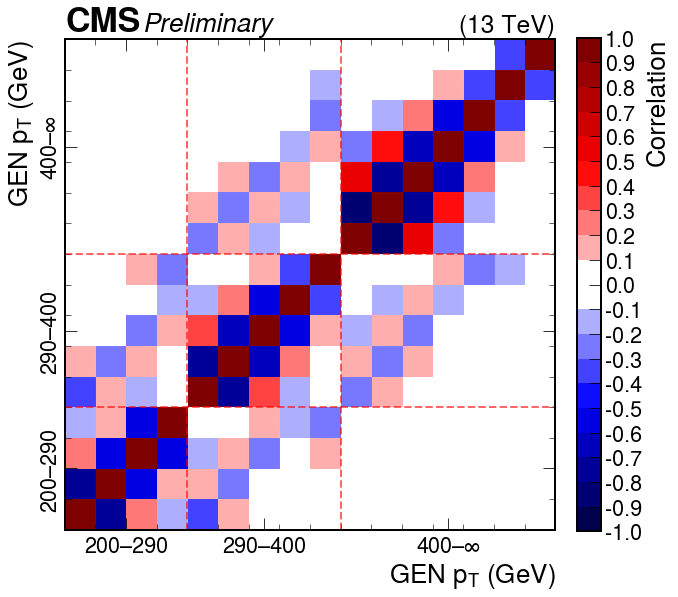

In [25]:
unfolder.plot_correlation()

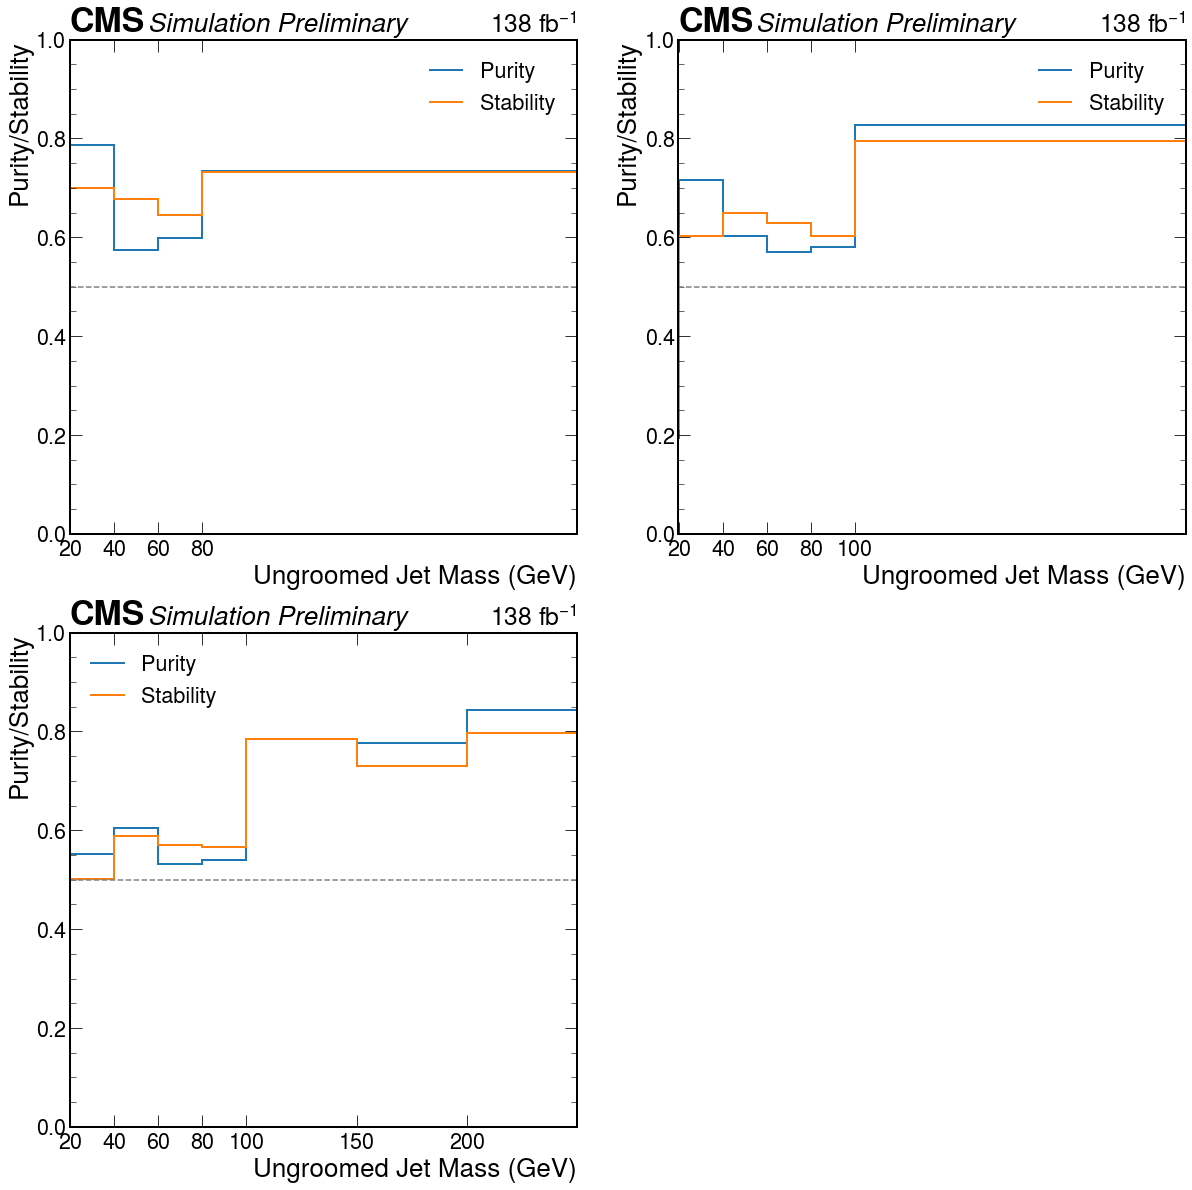

In [26]:
with open('latest_pkl/0508/all_lauren_bin_mc.pkl', "rb") as f:
    output_pythia= pkl.load( f )
plt.figure(figsize = (20, 20))
for i in range(3):
    plt.subplot(2, 2, i+1)
    m2d_h = output_pythia['response_matrix_u'].project('ptreco', 'mreco', 'mgen')[i, :, :]
    if i == 0:
        m2d_h = rebin_hist(m2d_h, 'mgen', [0, 10, 20, 40 , 60, 80, 13000])
        m2d_h = rebin_hist(m2d_h, 'mreco' , [0, 10, 20, 40 , 60, 80, 13000])
    if i == 1:
        m2d_h = rebin_hist(m2d_h, 'mgen', [0, 10, 20, 40 ,60, 80, 100, 13000])
        m2d_h = rebin_hist(m2d_h, 'mreco' , [0, 10, 20, 40 ,60, 80, 100, 13000])
    if i == 2:
        m2d_h = rebin_hist(m2d_h, 'mgen', [0, 10, 20, 40, 60 , 80, 100, 150, 200,  13000])
        m2d_h = rebin_hist(m2d_h, 'mreco' , [0, 10, 20, 40, 60 , 80, 100, 150, 200, 13000])
    mass_edges = m2d_h.axes[1].edges
    m2d = m2d_h.values()
    plt.stairs(np.diag(m2d)/m2d.sum(axis=0), mass_edges, label = 'Purity', lw = 2)
    plt.stairs(np.diag(m2d)/m2d.sum(axis=1), mass_edges, label = 'Stability', lw = 2)
    plt.legend()
    #draw a horizontal line at 0.5
    plt.axhline(0.5, color='gray', ls='--')
    plt.xlabel('Ungroomed Jet Mass (GeV)')
    plt.ylabel('Purity/Stability')
    hep.cms.label("Preliminary", data=False, rlabel = r"138 fb$^{-1}$")

    xtick_labels = [str(int(tick)) for tick in mass_edges]  # Convert to string
    xtick_labels[-1] = r"$\infty$"  # Replace last label with infinity
    plt.tick_params(axis='x', which='minor', top=False, bottom=False)

    plt.xticks(mass_edges, xtick_labels)
    plt.xlim(19.8,250)
    plt.ylim(0,1)
plt.show()

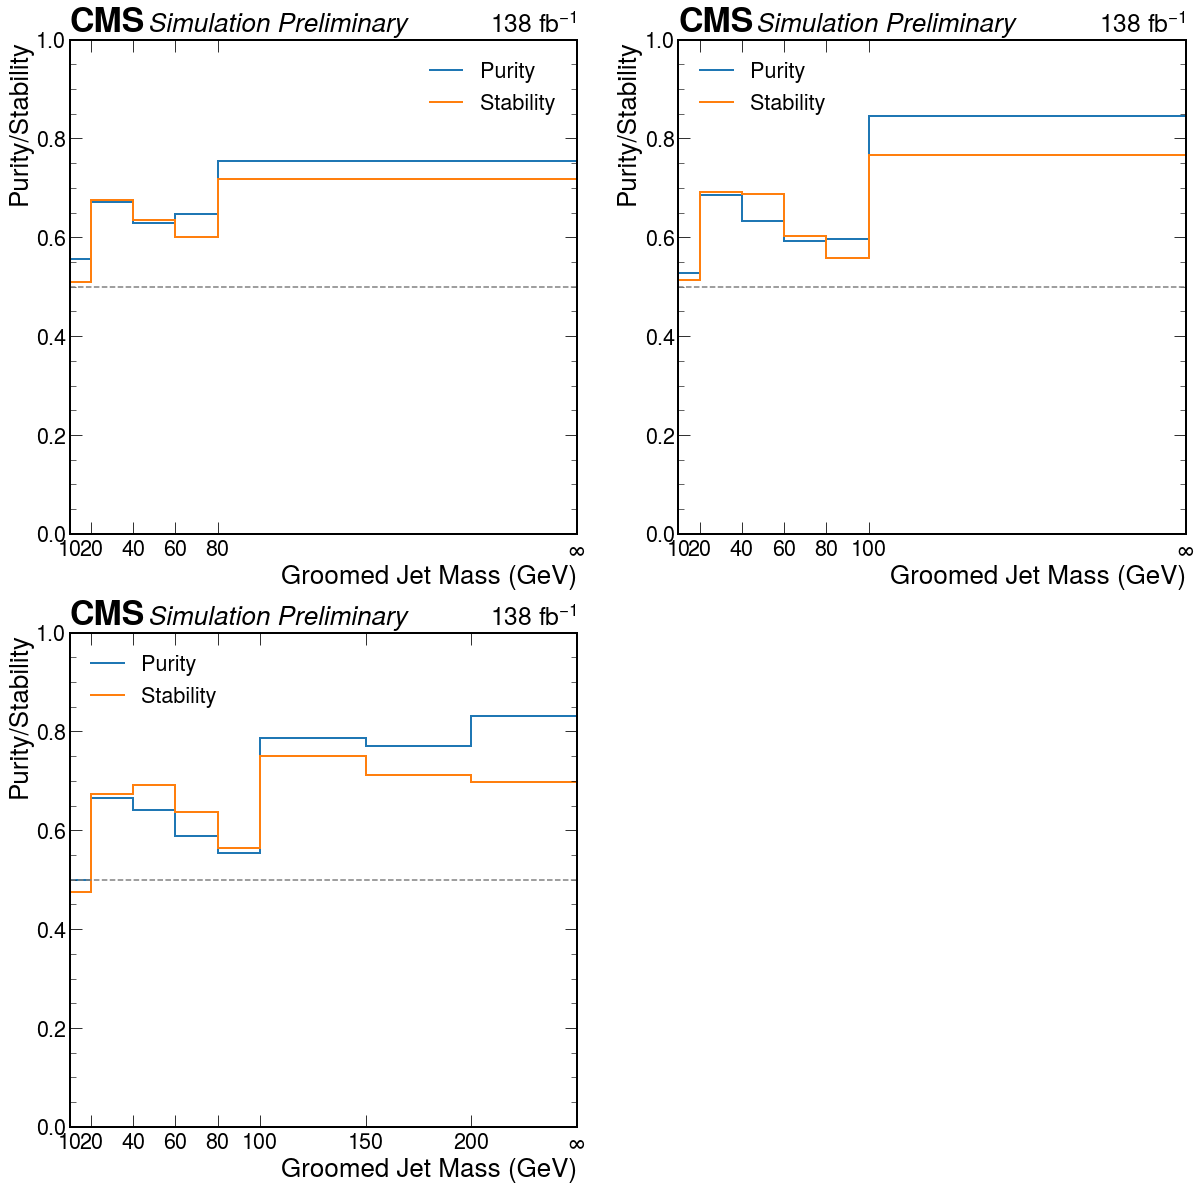

In [27]:
with open('latest_pkl/0508/all_lauren_bin_mc.pkl', "rb") as f:
    output_pythia= pkl.load( f )
plt.figure(figsize = (20, 20))
for i in range(3):
    plt.subplot(2, 2, i+1)
    m2d_h = output_pythia['response_matrix_g'].project('ptreco', 'mreco', 'mgen')[i, :, :]
    if i == 0:
        m2d_h = rebin_hist(m2d_h, 'mgen', [0, 10, 20, 40 , 60, 80, 13000])
        m2d_h = rebin_hist(m2d_h, 'mreco' , [0, 10, 20, 40 , 60, 80, 13000])
    if i == 1:
        m2d_h = rebin_hist(m2d_h, 'mgen', [0, 10, 20, 40 ,60, 80, 100,  13000])
        m2d_h = rebin_hist(m2d_h, 'mreco' , [0, 10, 20, 40 ,60, 80, 100,  13000])
    if i == 2:
        m2d_h = rebin_hist(m2d_h, 'mgen', [0, 10, 20, 40, 60 , 80, 100, 150, 200,  13000])
        m2d_h = rebin_hist(m2d_h, 'mreco' , [0, 10, 20, 40, 60 , 80, 100, 150, 200, 13000])
    mass_edges = m2d_h.axes[1].edges
    mass_edges[-1] = 250
    m2d = m2d_h.values()
    plt.stairs(np.diag(m2d)/m2d.sum(axis=0), mass_edges, label = 'Purity', lw = 2)
    plt.stairs(np.diag(m2d)/m2d.sum(axis=1), mass_edges, label = 'Stability', lw = 2)
    plt.legend()
    #draw a horizontal line at 0.5
    plt.axhline(0.5, color='gray', ls='--')
    plt.xlabel('Groomed Jet Mass (GeV)')
    plt.ylabel('Purity/Stability')
    hep.cms.label("Preliminary", data=False, rlabel = r"138 fb$^{-1}$")

    xtick_labels = [str(int(tick)) for tick in mass_edges]  # Convert to string
    xtick_labels[-1] = r"$\infty$"  # Replace last label with infinity
    plt.tick_params(axis='x', which='minor', top=False, bottom=False)

    plt.xticks(mass_edges, xtick_labels)
    plt.xlim(10,250)
    plt.ylim(0,1)
plt.show()

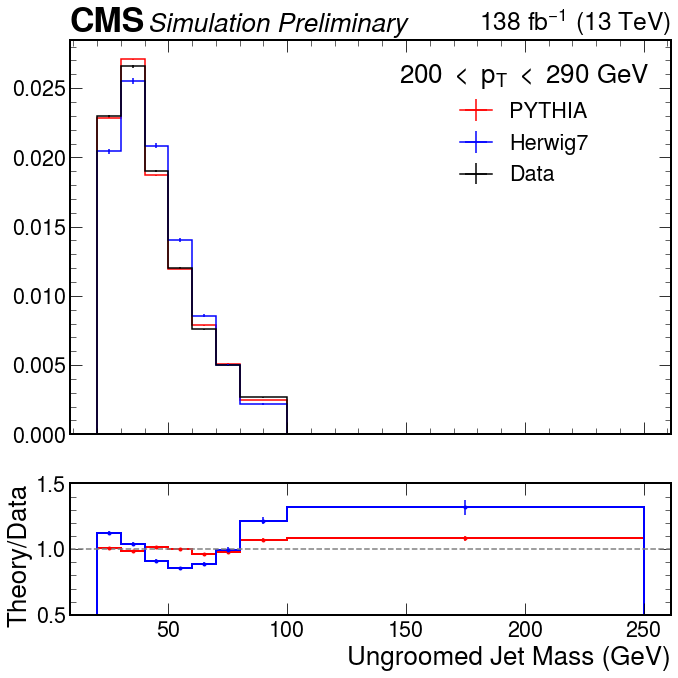

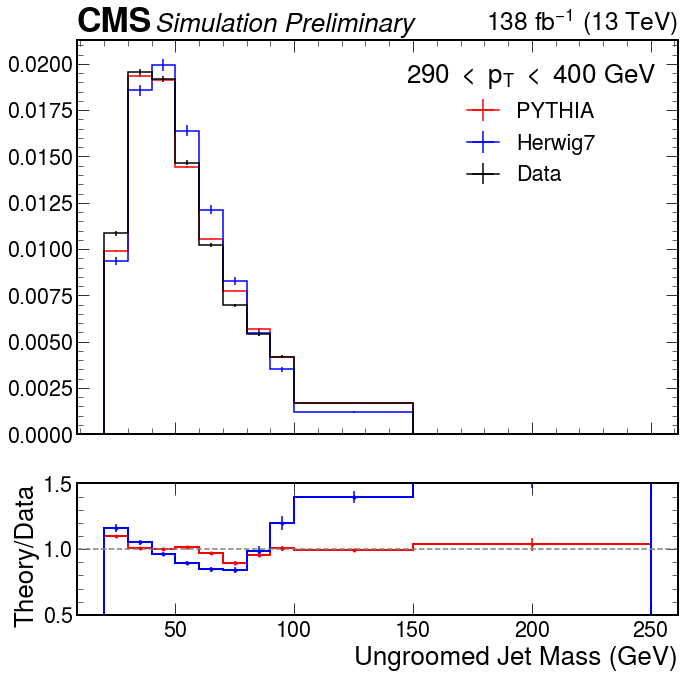

/tmp/ipykernel_2941596/2553842526.py:104: RuntimeWarning: divide by zero encountered in divide
  ratio2 = data_values_norm / mc2_values_norm
/tmp/ipykernel_2941596/2553842526.py:113: RuntimeWarning: invalid value encountered in divide
  (mc2_stat_norm / mc2_values_norm)**2


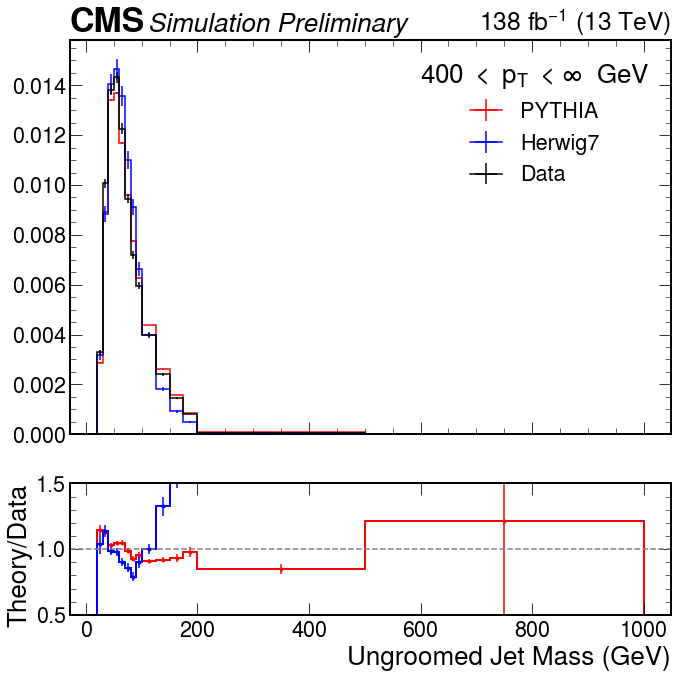

In [62]:
title_list = [r"200 $<$ $p_T$ $<$ 290 GeV", r"290 $<$ $p_T$ $<$ 400 GeV", r"400 $<$ $p_T$ $< \, \infty$  GeV"]
rlabel = r"138 fb$^{-1}$ (13 TeV)"
with open('latest_pkl/0508/all_lauren_bin_mc.pkl', "rb") as f:
    output_pythia= pkl.load( f )

with open('latest_pkl/0508/data_0508_full.pkl', "rb") as f:
    output_data= pkl.load( f )

with open('latest_pkl/0508/mc_0508_herwig.pkl', "rb") as f:
    output_herwig= pkl.load( f )


from unfold_tools import binning
bins = binning.bin_edges(groomed=groomed)

for ipt in range(3):
    mreco_edge = bins.reco_mass_edges_by_pt[ipt]
    mreco_edge_new = mreco_edge.copy()
    if ipt == 0:
        mreco_edge_new[-1] = 250
    if ipt == 1:
        mreco_edge_new[-1] = 250
    if ipt == 2:
        mreco_edge_new[-1] = 1000

    
    mreco_width = np.diff(mreco_edge)
    

    fig, (ax_main, ax_ratio) = plt.subplots(2, 1, sharex=True,
                                              
                                              gridspec_kw={'height_ratios': [3, 1]})
    resp_matrix_4d = output_pythia['response_matrix_u'] if not groomed else output_pythia['response_matrix_g']
    resp_matrix_4d_herwig = output_herwig['response_matrix_u'] if not groomed else output_herwig['response_matrix_g']
    input_data = output_data['ptjet_mjet_u_reco'] if not groomed else output_data['ptjet_mjet_g_reco']

    # use rebin_hist to rebin the histograms to the mreco_edge 

    resp_matrix_4d = rebin_hist(resp_matrix_4d, 'mreco', mreco_edge)
    resp_matrix_4d_herwig = rebin_hist(resp_matrix_4d_herwig, 'mreco', mreco_edge)
    input_data = rebin_hist(input_data, 'mreco', mreco_edge)
    
    mc_values = resp_matrix_4d.project('systematic','ptreco', 'mreco')['nominal',ipt, :].values()
    mc_values_norm = mc_values/mreco_width/mc_values.sum()
    mc_stat =  resp_matrix_4d.project('systematic','ptreco', 'mreco')['nominal',ipt, :].variances()**0.5
    mc_stat_norm = mc_stat/mreco_width/mc_values.sum()

    mc2_values = resp_matrix_4d_herwig.project('systematic','ptreco', 'mreco')['herwig',ipt, :].values()
    mc2_values_norm = mc2_values/mreco_width/mc2_values.sum()
    mc2_stat =  resp_matrix_4d_herwig.project('systematic','ptreco', 'mreco')['herwig',ipt, :].variances()**0.5
    mc2_stat_norm = mc2_stat/mreco_width/mc2_values.sum()

    
    data_values = input_data.project('ptreco', 'mreco')[ipt, :].values()
    data_values_norm = data_values/mreco_width/data_values.sum()
    data_stat = input_data.project('ptreco', 'mreco')[ipt, :].variances()**0.5
    data_stat_norm = data_stat/mreco_width/data_values.sum()


    ratio = np.divide(np.abs(mc_values_norm), np.abs(data_values_norm), out=np.ones_like(mc_values), where=data_values != 0)
    ratio2 = np.divide(np.abs(mc2_values_norm), np.abs(data_values_norm), out=np.ones_like(mc_values), where=data_values != 0)

    
    # hep.histplot(mc_values_norm, mreco_edge_new, yerr = mc_stat_norm, color = 'r',label = "PYTHIA", ax = ax_main)
    # hep.histplot(mc2_values_norm, mreco_edge_new, yerr = mc_stat_norm, color = 'b', label = "herwig7", ax = ax_main)
    # hep.histplot(data_values_norm, mreco_edge_new, yerr = data_stat_norm, color = 'k', label = "Data", ax = ax_main)
    # #ax_main.set_yscale('log')

    # print(data_values_norm)
    
    
    # plt.ylabel("#Events/GeV")
    # ax_main.legend(title = title_list[ipt])
    # xtick_labels = [str(int(tick)) for tick in mreco_edge_new]  # Convert to string
    # xtick_labels[-1] = r"$\infty$"  # Replace last label with infinity
    # plt.tick_params(axis='x', which='minor', top=False, bottom=False)
    # hep.cms.label("Preliminary", rlabel = rlabel, ax = ax_main)

    # #ax_main.set_yscale('log')



    # ax_ratio.stairs(ratio, mreco_edge_new, label="PYTHIA", color='r', lw= 2)
    # ax_ratio.stairs(ratio2, mreco_edge_new, label="PYTHIA", color='b', lw= 2)
    # ax_ratio.axhline(1, color='gray', linestyle='--')  # Reference line at 1
    mreco_edge_new = np.array(mreco_edge_new)
    # --- Main plots ---
    hep.histplot(mc_values_norm, mreco_edge_new, yerr=mc_stat_norm,
                 color='r', label="PYTHIA", ax=ax_main)
    hep.histplot(mc2_values_norm, mreco_edge_new, yerr=mc2_stat_norm,
                 color='b', label="Herwig7", ax=ax_main)
    hep.histplot(data_values_norm, mreco_edge_new, yerr=data_stat_norm,
                 color='k', label="Data", ax=ax_main)
    
    plt.ylabel("#Events/GeV")
    ax_main.legend(title=title_list[ipt])
    xtick_labels = [str(int(tick)) for tick in mreco_edge_new]
    xtick_labels[-1] = r"$\infty$"
    plt.tick_params(axis='x', which='minor', top=False, bottom=False)
    hep.cms.label("Preliminary", rlabel=rlabel, ax=ax_main)
    
    # --- Ratio calculation ---
    ratio1 = data_values_norm / mc_values_norm
    ratio2 = data_values_norm / mc2_values_norm
    
    # Error propagation
    ratio1_err = ratio1 * np.sqrt(
        (data_stat_norm / data_values_norm)**2 +
        (mc_stat_norm / mc_values_norm)**2
    )
    ratio2_err = ratio2 * np.sqrt(
        (data_stat_norm / data_values_norm)**2 +
        (mc2_stat_norm / mc2_values_norm)**2
    )
    
    # --- Ratio plots ---
    ax_ratio.stairs(ratio1, mreco_edge_new, label="PYTHIA", color='r', lw=2)
    ax_ratio.errorbar(
        0.5 * np.array(mreco_edge_new[1:] + mreco_edge_new[:-1]),  # bin centers
        ratio1,
        yerr=ratio1_err,
        fmt='.',
        color='r',

    )
    
    ax_ratio.stairs(ratio2, mreco_edge_new, label="Herwig7", color='b', lw=2)
    ax_ratio.errorbar(
        0.5 * np.array(mreco_edge_new[1:] + mreco_edge_new[:-1]),
        ratio2,
        yerr=ratio2_err,
        fmt='.',
        color='b'
    )
    
    ax_ratio.axhline(1, color='gray', linestyle='--')  # Reference line

    if not groomed:
        ax_ratio.set_xlabel("Ungroomed Jet Mass (GeV)")
    else:
        ax_ratio.set_xlabel("Groomed Jet Mass (GeV)")
    
    ax_ratio.set_ylabel("Theory/Data")
    ax_ratio.set_ylim(0.5, 1.5)

    
    plt.tight_layout()


    if groomed:
        plt.savefig(f'plots/unfold/input_groomed_{ipt}.pdf')
    else:
        plt.savefig(f'plots/unfold/input_ungroomed_{ipt}.pdf')
    #plt.xticks(mreco_edge_new, xtick_labels)
    plt.show()

In [52]:
mreco_edge_new = np.array(mreco_edge_new)
0.5 * (mreco_edge_new[1:] + mreco_edge_new[:-1])

array([ 25.,  35.,  45.,  55.,  65.,  75.,  90., 175.])

/tmp/ipykernel_2941596/2113152186.py:52: RuntimeWarning: invalid value encountered in divide
  miss_rate = misses[i, :].values()/(ptjet_mjet_gen[i, :].values()+misses[i, :].values())
/tmp/ipykernel_2941596/2113152186.py:53: RuntimeWarning: invalid value encountered in divide
  miss_rate_herwig = misses_herwig[i, :].values()/(ptjet_mjet_herwig_gen[i, :].values()+misses_herwig[i, :].values())
/tmp/ipykernel_2941596/2113152186.py:58: RuntimeWarning: invalid value encountered in divide
  fake_fraction = fakes[i, :].values()/ptjet_mjet[i, :].values()
/tmp/ipykernel_2941596/2113152186.py:59: RuntimeWarning: invalid value encountered in divide
  fake_fraction_herwig = fakes_herwig[i, :].values()/ptjet_mjet_herwig[i, :].values()


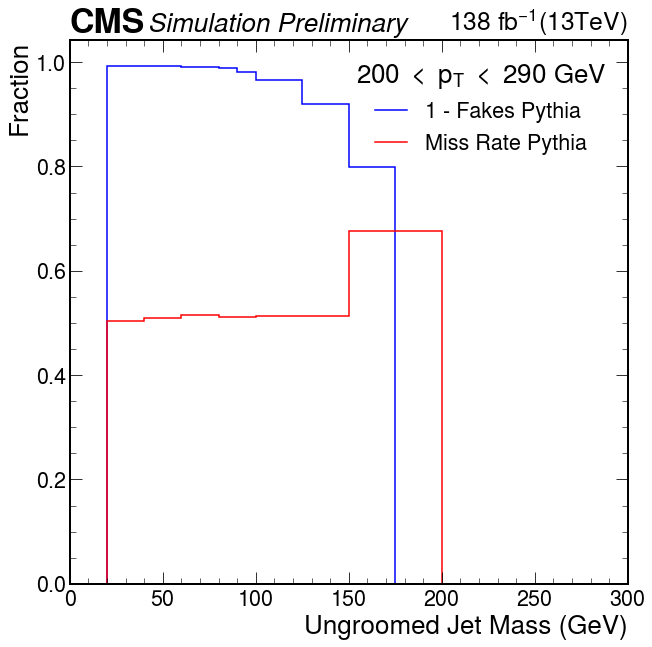

/tmp/ipykernel_2941596/2113152186.py:58: RuntimeWarning: invalid value encountered in divide
  fake_fraction = fakes[i, :].values()/ptjet_mjet[i, :].values()
/tmp/ipykernel_2941596/2113152186.py:59: RuntimeWarning: invalid value encountered in divide
  fake_fraction_herwig = fakes_herwig[i, :].values()/ptjet_mjet_herwig[i, :].values()


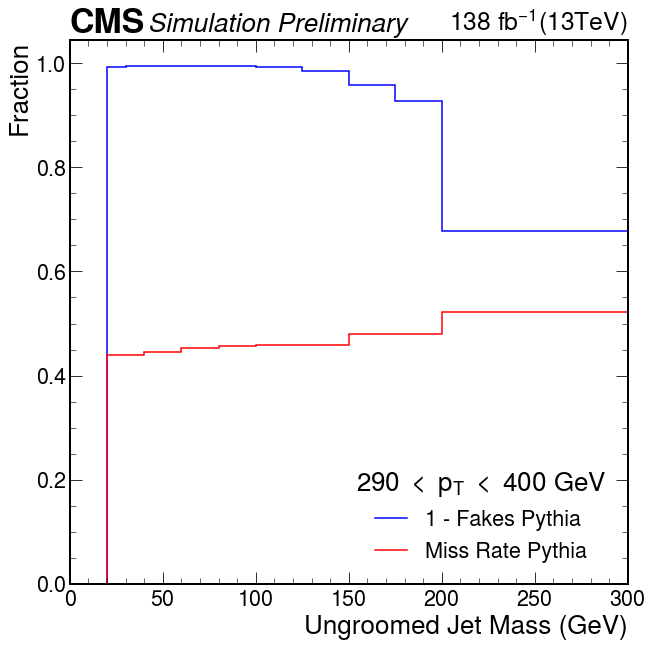

/tmp/ipykernel_2941596/2113152186.py:59: RuntimeWarning: invalid value encountered in divide
  fake_fraction_herwig = fakes_herwig[i, :].values()/ptjet_mjet_herwig[i, :].values()


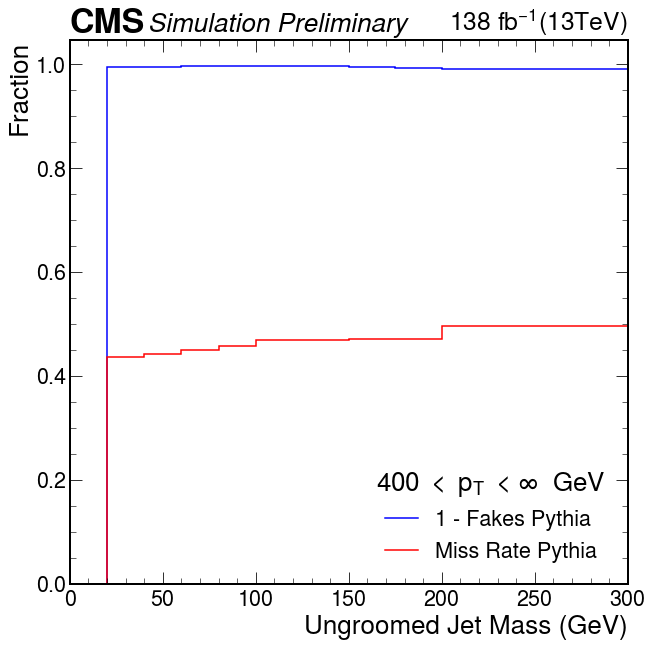

In [72]:
fakes_herwig = output_herwig['fakes_u'].project('ptreco', 'mreco')
ptjet_mjet_herwig = output_herwig['ptjet_mjet_u_reco'].project('ptreco', 'mreco')

fakes = output_pythia['fakes_u'].project('ptreco', 'mreco')
ptjet_mjet = output_pythia['ptjet_mjet_u_reco'].project('ptreco', 'mreco')


# misses / gen analog
misses_herwig = output_herwig['misses_u'].project('ptgen', 'mgen')
ptjet_mjet_herwig_gen = output_herwig['response_matrix_u'][{'systematic': 'herwig'}].project('ptgen', 'mgen')

misses = output_pythia['misses_u'].project('ptgen', 'mgen')
ptjet_mjet_gen = output_pythia['response_matrix_u'][{'systematic': 'nominal'}].project('ptgen', 'mgen')


for i in range(len(fakes.values())):
    
    mreco_edge = bins.reco_mass_edges_by_pt[ipt]
    mreco_edge_new = mreco_edge.copy()
    if ipt == 0:
        mreco_edge_new[-1] = 250
    if ipt == 1:
        mreco_edge_new[-1] = 250
    if ipt == 2:
        mreco_edge_new[-1] = 1000

    mgen_edge = bins.gen_mass_edges_by_pt[ipt]
    mgen_edge_new = mgen_edge.copy()
    if ipt == 0:
        mgen_edge_new[-1] = 250
    if ipt == 1:
        mgen_edge_new[-1] = 250
    if ipt == 2:
        mgen_edge_new[-1] = 1000


    mreco_width = np.diff(mreco_edge)

    fakes = rebin_hist(fakes, 'mreco', mreco_edge)
    fakes_herwig = rebin_hist(fakes_herwig, 'mreco', mreco_edge)
    ptjet_mjet = rebin_hist(ptjet_mjet, 'mreco', mreco_edge)
    ptjet_mjet_herwig = rebin_hist(ptjet_mjet_herwig, 'mreco', mreco_edge)

    misses = rebin_hist(misses, 'mgen', mgen_edge)
    misses_herwig = rebin_hist(misses_herwig, 'mgen', mgen_edge)
    ptjet_mjet_herwig_gen = rebin_hist(ptjet_mjet_herwig_gen, 'mgen', mgen_edge)
    ptjet_mjet_gen = rebin_hist(ptjet_mjet_gen, 'mgen', mgen_edge)

    true_miss_values = misses[i, :].values() - ptjet_mjet_gen[0, :].values()
    true_miss_values_herwig = misses_herwig[i, :].values() - ptjet_mjet_herwig_gen[0, :].values()

    miss_rate = misses[i, :].values()/(ptjet_mjet_gen[i, :].values()+misses[i, :].values())
    miss_rate_herwig = misses_herwig[i, :].values()/(ptjet_mjet_herwig_gen[i, :].values()+misses_herwig[i, :].values())

    # miss_rate = true_miss_values/(ptjet_mjet_gen[i, :].values()+true_miss_values)
    # miss_rate_herwig = true_miss_values_herwig/(ptjet_mjet_herwig_gen[i, :].values()+true_miss_values_herwig)

    fake_fraction = fakes[i, :].values()/ptjet_mjet[i, :].values()
    fake_fraction_herwig = fakes_herwig[i, :].values()/ptjet_mjet_herwig[i, :].values()


    #hep.histplot(1 - fake_fraction_herwig, mreco_edge, label = '1 - Fakes Herwig', color = 'red', ls = '--')
    hep.histplot(1 - fake_fraction, mreco_edge, label = '1 - Fakes Pythia', color = 'blue', ls = '-')
    #hep.histplot(miss_rate_herwig, mgen_edge, label = 'Miss Rate Herwig', color = 'red', ls = '-')
    hep.histplot(miss_rate, mgen_edge, label = 'Miss Rate Pythia', color = 'red', ls = '-')
    plt.legend(title = title_list[i])
    plt.xlabel("Groomed Jet Mass (GeV)" if groomed else "Ungroomed Jet Mass (GeV)")
    hep.cms.label("Preliminary", rlabel = r"138 $fb^{-1} (13 TeV)$")
    plt.ylabel("Fraction")
    plt.xlim(0, 300)
    plt.show()

/tmp/ipykernel_2941596/3520675447.py:53: RuntimeWarning: invalid value encountered in divide
  miss_rate_herwig = misses_herwig[i, :].values()/(ptjet_mjet_herwig_gen[i, :].values()+misses_herwig[i, :].values())
/tmp/ipykernel_2941596/3520675447.py:59: RuntimeWarning: invalid value encountered in divide
  fake_fraction_herwig = fakes_herwig[i, :].values()/ptjet_mjet_herwig[i, :].values()


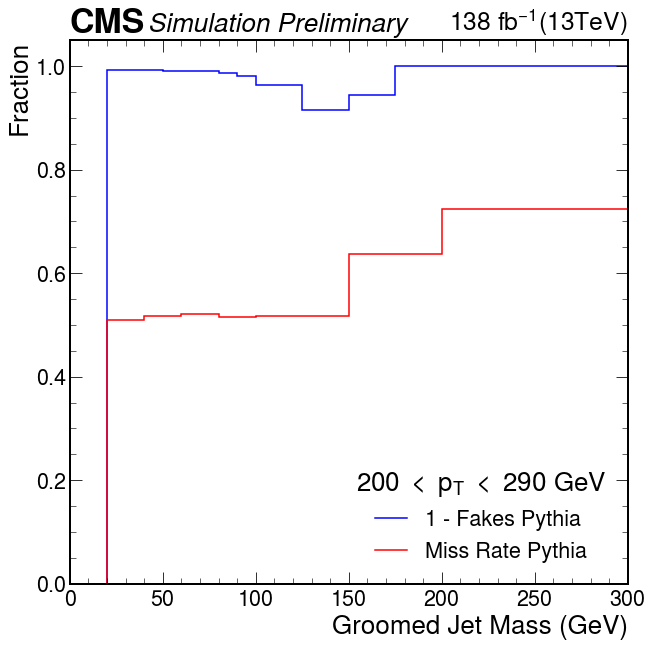

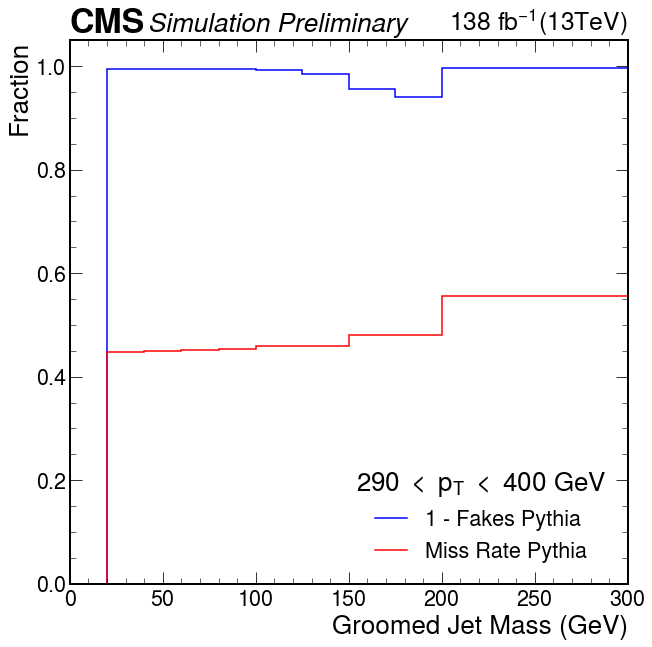

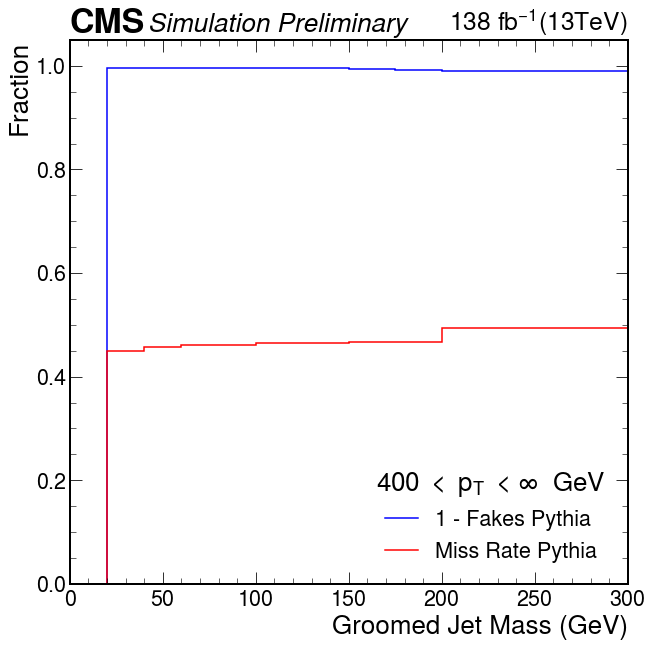

In [74]:
fakes_herwig = output_herwig['fakes_g'].project('ptreco', 'mreco')
ptjet_mjet_herwig = output_herwig['ptjet_mjet_g_reco'].project('ptreco', 'mreco')

fakes = output_pythia['fakes_g'].project('ptreco', 'mreco')
ptjet_mjet = output_pythia['ptjet_mjet_g_reco'].project('ptreco', 'mreco')


# misses / gen analog
misses_herwig = output_herwig['misses_g'].project('ptgen', 'mgen')
ptjet_mjet_herwig_gen = output_herwig['response_matrix_g'][{'systematic': 'herwig'}].project('ptgen', 'mgen')

misses = output_pythia['misses_g'].project('ptgen', 'mgen')
ptjet_mjet_gen = output_pythia['response_matrix_g'][{'systematic': 'nominal'}].project('ptgen', 'mgen')


for i in range(len(fakes.values())):
    
    mreco_edge = bins.reco_mass_edges_by_pt[ipt]
    mreco_edge_new = mreco_edge.copy()
    if ipt == 0:
        mreco_edge_new[-1] = 250
    if ipt == 1:
        mreco_edge_new[-1] = 250
    if ipt == 2:
        mreco_edge_new[-1] = 1000

    mgen_edge = bins.gen_mass_edges_by_pt[ipt]
    mgen_edge_new = mgen_edge.copy()
    if ipt == 0:
        mgen_edge_new[-1] = 250
    if ipt == 1:
        mgen_edge_new[-1] = 250
    if ipt == 2:
        mgen_edge_new[-1] = 1000


    mreco_width = np.diff(mreco_edge)

    fakes = rebin_hist(fakes, 'mreco', mreco_edge)
    fakes_herwig = rebin_hist(fakes_herwig, 'mreco', mreco_edge)
    ptjet_mjet = rebin_hist(ptjet_mjet, 'mreco', mreco_edge)
    ptjet_mjet_herwig = rebin_hist(ptjet_mjet_herwig, 'mreco', mreco_edge)

    misses = rebin_hist(misses, 'mgen', mgen_edge)
    misses_herwig = rebin_hist(misses_herwig, 'mgen', mgen_edge)
    ptjet_mjet_herwig_gen = rebin_hist(ptjet_mjet_herwig_gen, 'mgen', mgen_edge)
    ptjet_mjet_gen = rebin_hist(ptjet_mjet_gen, 'mgen', mgen_edge)

    true_miss_values = misses[i, :].values() - ptjet_mjet_gen[0, :].values()
    true_miss_values_herwig = misses_herwig[i, :].values() - ptjet_mjet_herwig_gen[0, :].values()

    miss_rate = misses[i, :].values()/(ptjet_mjet_gen[i, :].values()+misses[i, :].values())
    miss_rate_herwig = misses_herwig[i, :].values()/(ptjet_mjet_herwig_gen[i, :].values()+misses_herwig[i, :].values())

    # miss_rate = true_miss_values/(ptjet_mjet_gen[i, :].values()+true_miss_values)
    # miss_rate_herwig = true_miss_values_herwig/(ptjet_mjet_herwig_gen[i, :].values()+true_miss_values_herwig)

    fake_fraction = fakes[i, :].values()/ptjet_mjet[i, :].values()
    fake_fraction_herwig = fakes_herwig[i, :].values()/ptjet_mjet_herwig[i, :].values()


    #hep.histplot(1 - fake_fraction_herwig, mreco_edge, label = '1 - Fakes Herwig', color = 'red', ls = '--')
    hep.histplot(1 - fake_fraction, mreco_edge, label = '1 - Fakes Pythia', color = 'blue', ls = '-')
    #hep.histplot(miss_rate_herwig, mgen_edge, label = 'Miss Rate Herwig', color = 'red', ls = '-')
    hep.histplot(miss_rate, mgen_edge, label = 'Miss Rate Pythia', color = 'red', ls = '-')
    plt.legend(title = title_list[i])
    plt.xlabel("Groomed Jet Mass (GeV)")
    hep.cms.label("Preliminary", rlabel = r"138 $fb^{-1} (13 TeV)$")
    plt.ylabel("Fraction")
    plt.xlim(0, 300)
    plt.show()
